# Wrangle Exercises

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

## Data Acquisition

In [2]:
# Importing libraries

import pandas as pd
import env
import seaborn as sns
import requests
import os
import matplotlib.pyplot as plt

In [ ]:
# Getting conncection to mySQL database, and acquiring data

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_zillow_data():
    '''
    This function reads the Zillow data from the mySQL database into a df.
    '''
    # Create SQL query.
    sql_query = '''
    SELECT 
    bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM
    properties_2017;
    '''
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    return df

In [3]:
df = new_zillow_data()

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 159.4 MB


In [8]:
df.shape

(2985217, 7)

#### Acquire and Summarize Takeaways

- each columns have null values
- null values contribute 2.8% of the data

## Data Preparation

#### Rename Columns

In [44]:
# Changing column into more meaningful, convenient names

df.rename(columns = {'bedroomcnt':'bedrooms'}, inplace = True)

In [46]:
df.rename(columns = {'bathroomcnt':'bathrooms'}, inplace = True)
df.rename(columns = {'calculatedfinishedsquarefeet':'square_feet'}, inplace = True)
df.rename(columns = {'taxvaluedollarcnt':'tax_assessed_value'}, inplace = True)
df.rename(columns = {'taxamount':'tax_amount'}, inplace = True)
df.rename(columns = {'fips':'fips_code'}, inplace = True)

####  Drop Null Values

In [39]:
# Dropping null values

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901918 entries, 2 to 2982283
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 241.6 MB


In [40]:
df.shape

(2901918, 7)

In [24]:
# formatting numbers display

pd.options.display.float_format = '{:,.2f}'.format

In [25]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,"2,901,918.00","2,901,918.00","2,901,918.00","2,901,918.00","2,901,918.00","2,901,918.00","2,901,918.00"
mean,3.17,2.27,"1,836.48","444,828.17","1,964.26","5,456.14","6,047.88"
std,1.19,1.03,"1,935.55","730,804.47",23.63,"8,740.16",20.09
min,0.00,0.00,1.00,22.00,"1,801.00",5.04,"6,037.00"
25%,2.00,2.00,"1,218.00","192,600.00","1,950.00","2,543.66","6,037.00"
50%,3.00,2.00,"1,581.00","324,450.00","1,963.00","4,059.52","6,037.00"
75%,4.00,3.00,"2,148.00","516,903.00","1,981.00","6,277.86","6,059.00"
max,25.00,32.00,"952,576.00","287,098,486.00","2,016.00","3,458,861.12","6,111.00"


#### Visualize Distributions

- Histogram

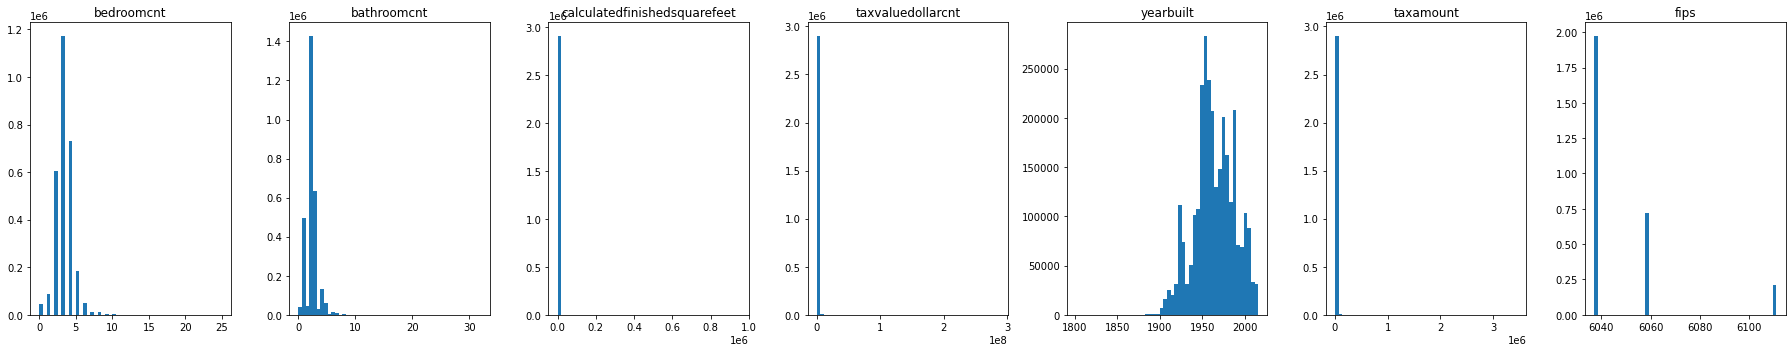

In [43]:
# list of numeric columns
cols = [col for col in df.columns]

# figsize width to height
plt.figure(figsize=(25, 5))

# loop to iterate over columns
for i, col in enumerate(cols):
        
        # i starts at 0 but plot numbers should start at 1
        plot_number = i + 1
        
        # create subplot
        plt.subplot(1, len(cols), plot_number)
        
        # create title with the column name
        plt.title(col)
        
        # display a histogram for each of the columns            
        df[col].hist(bins=50)
        
        # Hide gridlines.
        plt.grid(False)
         
        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)
    
plt.tight_layout()
plt.show()

- Boxplot

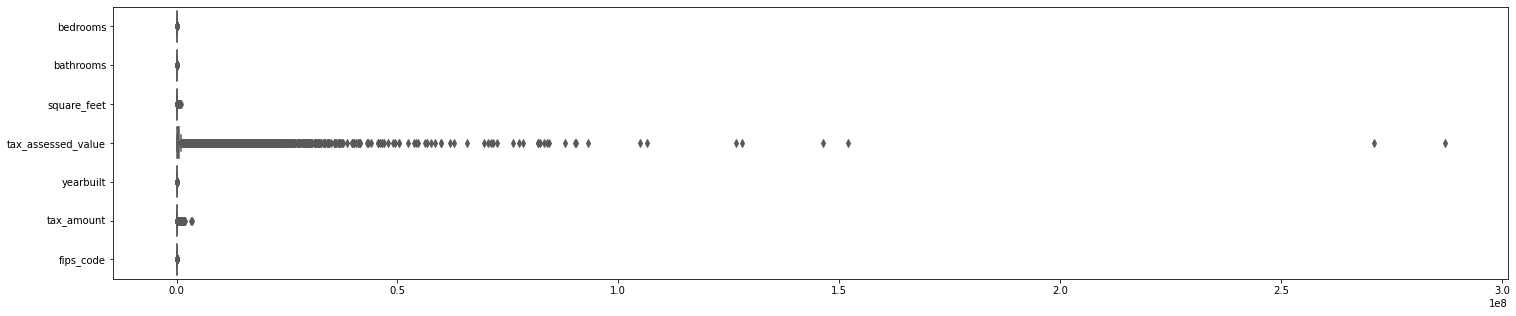

In [48]:
plt.figure(figsize=(25, 5))
ax = sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()